In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['repository']


In [54]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

In [55]:
(train_x, train_y),(test_x, test_y) = mnist.load_data()

In [56]:
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)
train_x = train_x/255.0
test_x = test_x/255.0

In [57]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape = (28, 28, 1), name='conv_1'))
model.add(BatchNormalization(name='batch_norm_1'))

model.add(Conv2D(64, (3,3), name='conv_2'))
model.add(BatchNormalization(name='batch_norm_2'))
model.add(MaxPooling2D(pool_size=(2,2), name='max_pool_1'))

model.add(Flatten(name='flatten'))
model.add(Dense(128, activation='relu', name='dense_1'))
model.add(BatchNormalization(name='batch_norm_3'))

model.add(Dense(10, activation='softmax', name='dense_2'))

model.compile(loss= 'categorical_crossentropy' , optimizer= keras.optimizers.Adadelta(), metrics=['accuracy'])

In [58]:
train = model.fit(train_x, keras.utils.to_categorical(train_y), batch_size=128, epochs=5, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 6s 125us/step - loss: 0.1590 - acc: 0.9530 - val_loss: 0.0864 - val_acc: 0.9734
Epoch 2/5
48000/48000 [==============================] - 4s 91us/step - loss: 0.0520 - acc: 0.9850 - val_loss: 0.0778 - val_acc: 0.9759
Epoch 3/5
48000/48000 [==============================] - 4s 91us/step - loss: 0.0294 - acc: 0.9916 - val_loss: 0.0507 - val_acc: 0.9839
Epoch 4/5
48000/48000 [==============================] - 4s 91us/step - loss: 0.0165 - acc: 0.9956 - val_loss: 0.0464 - val_acc: 0.9852
Epoch 5/5
48000/48000 [==============================] - 4s 91us/step - loss: 0.0085 - acc: 0.9983 - val_loss: 0.0439 - val_acc: 0.9869


In [59]:
model.save_weights('weights.h5')

In [60]:
new_model = Sequential()

new_model.add(Conv2D(32, kernel_size=(3,3), input_shape = (28, 28, 1), name='conv_1', trainable= False))
new_model.add(BatchNormalization(name='batch_norm_1', trainable= False))

new_model.add(Conv2D(64, (3,3), name='conv_2', trainable= False))
new_model.add(BatchNormalization(name='batch_norm_2', trainable= False))
new_model.add(MaxPooling2D(pool_size=(2,2), name='max_pool_1', trainable= False))

new_model.add(Flatten())
new_model.add(Dense(128, activation='relu', name='dense_1', trainable= False))
new_model.add(BatchNormalization(name='batch_norm_3', trainable= False))

new_model.add(Dense(10, activation='softmax', name='dense_2'))

new_model.compile(loss= 'categorical_crossentropy' , optimizer= keras.optimizers.Adadelta(), metrics=['accuracy'])

In [61]:
new_model.load_weights('weights.h5', by_name=True)

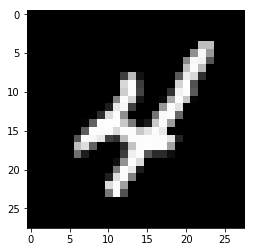

In [62]:
plt.imshow(train_x[9].reshape(28, 28),cmap='gray', vmin=0, vmax=1 )

In [69]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1. /255,
    data_format = 'channels_last')

train_generator = train_datagen.flow_from_directory('../input/repository/subhrajyotidasgupta-barc_projects-a673535/Numeral/train',
                                                   target_size = (28,28),
                                                   batch_size = 8,
                                                   color_mode = 'grayscale',
                                                   class_mode = 'categorical')

Found 106 images belonging to 10 classes.


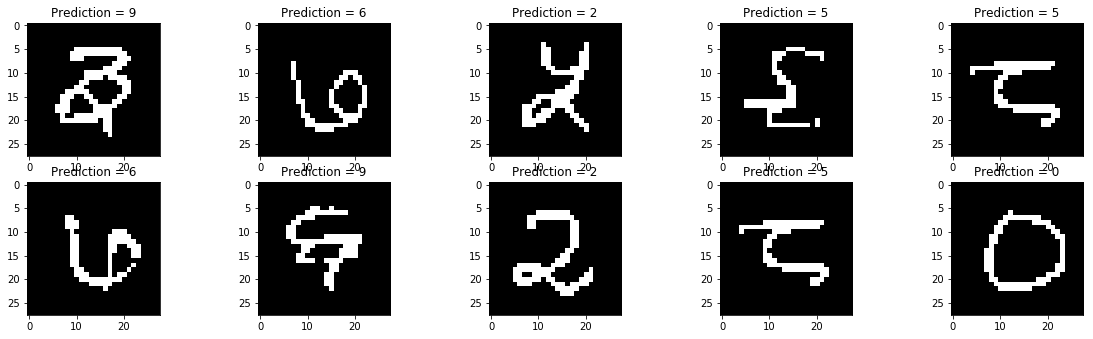

In [70]:
import cv2 

fig = plt.figure(figsize=(20,20))
for i in range(1,11):
    img = cv2.copyMakeBorder(train_generator[i][0][0].reshape(28,28),5,5,5,5,cv2.BORDER_CONSTANT,value=[255,255,255])
    img = cv2.resize(img, (28, 28))
    ret,img = cv2.threshold(img,0.85,1,cv2.THRESH_BINARY_INV) 
    #kernel = np.ones((2,2), np.uint8) 
    #img = cv2.dilate(img, kernel, iterations=1)
    
    fig.add_subplot(7,5,i)
    plt.imshow(img, cmap='gray', vmin=0, vmax=1)
    #print(img)
    img = np.expand_dims(img, 0)
    img = np.expand_dims(img, -1)

    
    train_preds = new_model.predict(img)
    plt.title("Prediction = " + str(np.argmax(train_preds)))
plt.show()